<div align="center"><b><font size="1"> LearnPlatform COVID-19 Impact on Digital Learning </font> </b></div>
   
 
    
 
        
 <div align="center"><b><font size="3.5"><a id =''> During COVID-19, what are the effects of State and Federal funding  - priorities and inadequacies?</a>

    
  <div align="right"><b><font size="1.0"> Presented by: Babatunde Sogunro.   jombaba.s7@gmail.com /  </font> </b></div>


 - The aim is to examine Local and Federal funding patterns with respect to the eligibility of students either for free lunch or for reduced-price lunch.
   - Typically, the % of students taking part in these food programs should increase given the availabilty of Federal funds spent to reinburse State funds spent on feeding the children.
   
"Children are America's greatest treasure, and ensuring their health is one of our most important duties as parents, families, and community members. Our children's continued ability to learn in the classroom, grow up healthy, and reach their full potential will depend on what we do now to secure their future. The National School Lunch Program has been a central part of our Nation's commitment to healthy children since its inception in 1946, improving the nutrition of generations of children with affordable, nutritious meals at school. It now serves tens of millions of children every day."

(extracted from Proclamation 8733:National School Lunch Week, 2011 by Barack Obama. 

https://en.wikisource.org/wiki/National_School_Lunch_Week,_2011 )

The following is the approach taken in answering this question:
- analysed data to the extent to which it provides answer to students' eligibilty for free lunch or reduced-price lunch.

- used subsets and combinations of the datasets for the analysis.
  
- used Machine Learning and Statistical techniques to analyse the data.

- plausible answers to the question will emerge from insights provided by results of data analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# load python modules and libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

In [2]:
### LOAD THE DATA

# load data for eligibilty for free lunch analysis
df = pd.read_csv('C:/Users/Owner/Desktop/DISTRICTS101DATACLEANED.csv')

# load data for eligibility for reduced-price lunch analysis
df1 = pd.read_csv('C:/Users/Owner/Desktop/DISTRICTS101DATACLEANED_2.csv')

In [3]:
# convert values in thepct_free_lunch column
df.loc[df['pct_free_lunch'] == 0.0, 'target'] = '-'
df.loc[df['pct_free_lunch'] == 0.2, 'target'] = '-'
df.loc[df['pct_free_lunch'] == 0.4, 'target'] = '+'
df.loc[df['pct_free_lunch'] == 0.6, 'target'] = '+'
df.loc[df['pct_free_lunch'] == 0.8, 'target'] = '+'


# generate features and outcome variables
X = features = df[['locale','pct_black','pct_hispanic','local_expenditure']].values.reshape((df.shape[0],4))
y = outcome = df['target'].values

# covert objects to numbers by pandas.get_dummies
df_dummies = pd.get_dummies(df,columns=(['target','locale']))

# replace nulls with 0.0
df_dummies.fillna(value=0.0, inplace=True)

# generate features and outcome variables
X = features = df_dummies[['pct_black','pct_hispanic','local_expenditure','locale_City','locale_Rural','locale_Suburb','locale_Town']].values.reshape((df.shape[0],7))
#y = outcome = df_dummies['target'].values
df_dummies.info(), df_dummies.head(3),

# generate features sets (X)
X_train = df_dummies.values[0:88]
X_test = df_dummies.values[88:]
X_train.shape, X_test.shape

# split training feature and target sets into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# train with Gradient Boosting algorithm
# compute the accuracy scores on train and test sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))

    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               88 non-null     int64  
 1   state                     88 non-null     object 
 2   pct_black                 88 non-null     float64
 3   pct_hispanic              88 non-null     float64
 4   pct_black_hispanic        88 non-null     float64
 5   pct_white                 88 non-null     float64
 6   pct_free_lunch            88 non-null     float64
 7   pct_reduced_price_lunch   88 non-null     float64
 8   county_connections_ratio  88 non-null     object 
 9   local_expenditure         88 non-null     int64  
 10  federal_expenditure       88 non-null     int64  
 11  target_+                  88 non-null     uint8  
 12  target_-                  88 non-null     uint8  
 13  locale_City               88 non-null     uint8  
 14  locale_Rural

In [4]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on test set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 6  3]
 [ 3 10]]

Classification Report
              precision    recall  f1-score   support

           +       0.67      0.67      0.67         9
           -       0.77      0.77      0.77        13

    accuracy                           0.73        22
   macro avg       0.72      0.72      0.72        22
weighted avg       0.73      0.73      0.73        22



C:\Users\Owner\anaconda3_08222021\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


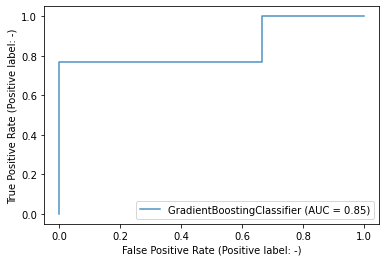

In [5]:
gb.fit(X_train, y_train)
ax=plt.gca()
gb_display = plot_roc_curve(gb,X_test,y_test,ax=ax,alpha=0.8)
plt.show()

In [6]:
# convert values in thepct_free_lunch column
df1.loc[df['pct_reduced_price_lunch'] == 0.2, 'target'] = '-'
df1.loc[df['pct_reduced_price_lunch'] == 0.4, 'target'] = '-'
df1.loc[df['pct_reduced_price_lunch'] == 0.6, 'target'] = '+'
df1.loc[df['pct_reduced_price_lunch'] == 0.8, 'target'] = '+'
df1.loc[df['pct_reduced_price_lunch'] == 1, 'target'] = '+'

# generate features and outcome variables
X = features = df1[['locale','pct_black','pct_hispanic','local_expenditure']].values.reshape((df1.shape[0],4))
y = outcome = df1['target'].values

# covert objects to numbers by pandas.get_dummies
df1_dummies = pd.get_dummies(df1,columns=(['target','locale']))

# replace nulls with 0.0
df1_dummies.fillna(value=0.0, inplace=True)

# generate features and outcome variables
X = features = df1_dummies[['pct_black','pct_hispanic','local_expenditure','locale_City','locale_Rural','locale_Suburb','locale_Town']].values.reshape((df.shape[0],7))
#y = outcome = df_dummies['target'].values #.reshape((df.shape[1],2))
#y = outcome = df_dummies['target_+','target_-'].values

# generate features sets (X)
X_train = df1_dummies.values[0:88]
X_test = df1_dummies.values[88:]
#X_train.shape, X_test.shape

# split training feature and target sets into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and test sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))

    print()

Learning rate:  0.05
Accuracy score (training): 0.833
Accuracy score (test): 0.727

Learning rate:  0.1
Accuracy score (training): 0.864
Accuracy score (test): 0.864

Learning rate:  0.25
Accuracy score (training): 0.879
Accuracy score (test): 0.818

Learning rate:  0.5
Accuracy score (training): 0.894
Accuracy score (test): 0.727

Learning rate:  0.75
Accuracy score (training): 0.894
Accuracy score (test): 0.727

Learning rate:  1
Accuracy score (training): 0.894
Accuracy score (test): 0.818



In [7]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on test set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 6  3]
 [ 3 10]]

Classification Report
              precision    recall  f1-score   support

           +       0.67      0.67      0.67         9
           -       0.77      0.77      0.77        13

    accuracy                           0.73        22
   macro avg       0.72      0.72      0.72        22
weighted avg       0.73      0.73      0.73        22



C:\Users\Owner\anaconda3_08222021\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


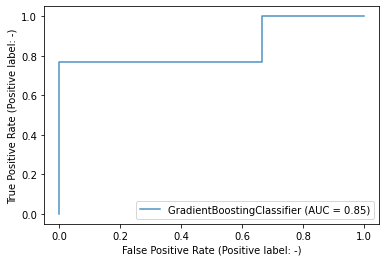

In [8]:

gb.fit(X_train, y_train)
ax=plt.gca()
gb_display = plot_roc_curve(gb,X_test,y_test,ax=ax,alpha=0.8)
plt.show()

####   <a id=""> Data Analysis Results </a> 
   - results of data analysis for question 3 are presented below:-
      - confusion matrix
      - classification report

NOTE: The GradientBoostingClassifier model churned out the same results for both 'Free Lunch' and 'Reduced-Price Lunch' categories.

In [9]:
# Output confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 6  3]
 [ 3 10]]

Classification Report
              precision    recall  f1-score   support

           +       0.67      0.67      0.67         9
           -       0.77      0.77      0.77        13

    accuracy                           0.73        22
   macro avg       0.72      0.72      0.72        22
weighted avg       0.73      0.73      0.73        22



#### <a id=""> Possible Direction for Policy(ies) </a>
Data revealed the following evidence that could be useful considerations in policy formulation.
   - the model was about 85% (AUC=0.85) successful in seperating the students this way.
   - on average 23% of those declared positive might in fact be negative.
   - among all students classified into the positive group (those eligible), about 33% of these are truly belong to the negative group (those ineligible).
   - the true negative rate = 0.77 while, the true positive rate = 0.67. This means that the model performs better at correctly predicting the negative group.
   
This evidence should be taken into consideration in (for example, what steps need to be taken to reduce wasteage of funds) formulating firmer policy(ies) in the use of funds.